# INTRODUCTION
This notebook uses dataset from IMDb, Box Office Mojo, and The Movie Database (TMDb) to give analysis for Microsoft's new movie studio. The notebooks had the following names and information.

1. title.basics.csv
    - tconst : alphanumeric unique identifier of the title	
    - primary_title	: the more popular title / the title used by the filmmakers on promotional materials at the point of release
    - original_title: original title, in the original language	
    - start_year: represents the release year of a title. In the case of TV Series, it is the series start year
    - runtime_minutes: primary runtime of the title, in minutes
    - genres: includes up to three genres associated with the title
2. tmdb.movies.csv
    - Unnamed: 0	
    - genre_ids	
    - id	
    - original_language	
    - original_title	
    - popularity	
    - release_date	
    - title	
    - vote_average	
    - vote_count
3. tn.movie_budgets.csv
    - id	
    - release_date	
    - movie	
    - production_budget	
    - domestic_gross	
    - worldwide_gross


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [78]:
df1 = pd.read_csv("title.basics.csv")
df2 = pd.read_csv("tmdb.movies.csv")
df3 = pd.read_csv("tn.movie_budgets.csv")

In [79]:
df1.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [80]:
df2.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [81]:
df3.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Cleaning the first database(Title Basics)

df1 = title.basics.csv

In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [83]:
#drop runtime_minutes, original_title and stat_year
df1 = df1.drop(['runtime_minutes', 'tconst', 'original_title', 'start_year'],axis = 1)

In [84]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   primary_title  146144 non-null  object
 1   genres         140736 non-null  object
dtypes: object(2)
memory usage: 2.2+ MB


In [85]:
#convert primary_title to small letter for consistency
df1['primary_title'] = df1['primary_title'].str.lower()

In [86]:
df1.head()

,primary_title,genres
0,sunghursh,"Action,Crime,Drama"
1,one day before the rainy season,"Biography,Drama"
2,the other side of the wind,Drama
3,sabse bada sukh,"Comedy,Drama"
4,the wandering soap opera,"Comedy,Drama,Fantasy"


In [87]:
#count null value
df1.isna().sum().sum()

5408

In [88]:
#drop null values
df1.dropna(inplace = True)

In [89]:
#drop any duplicate values
df1 = df1.drop_duplicates(subset=None, keep='first')

In [90]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139059 entries, 0 to 146143
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   primary_title  139059 non-null  object
 1   genres         139059 non-null  object
dtypes: object(2)
memory usage: 3.2+ MB


In [91]:
#genres with mulitple columns can be combined to multiple
df1.loc[df1["genres"].str.contains(","),"genres"] = 'multiple_gen'

In [92]:
df1.head()

,primary_title,genres
0,sunghursh,multiple_gen
1,one day before the rainy season,multiple_gen
2,the other side of the wind,Drama
3,sabse bada sukh,multiple_gen
4,the wandering soap opera,multiple_gen


# Cleaning the second dataset (tmdb movies)
df2 = tmdb.movies.csv

In [93]:
df2.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [94]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [95]:
#drop columns : unnamed: 0, genre_ids, id, original_title
df2 = df2.drop(['Unnamed: 0', 'genre_ids','id', 'original_title'],axis = 1)

In [96]:
#drop any duplicate values
df2 = df2.drop_duplicates(subset=None, keep='first')

In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_language  25497 non-null  object 
 1   popularity         25497 non-null  float64
 2   release_date       25497 non-null  object 
 3   title              25497 non-null  object 
 4   vote_average       25497 non-null  float64
 5   vote_count         25497 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 1.4+ MB


In [98]:
#convert title to lowercase for consistency
df2['title'] = df2['title'].str.lower()

In [99]:
df2['title'].head()

0    harry potter and the deathly hallows: part 1
1                        how to train your dragon
2                                      iron man 2
3                                       toy story
4                                       inception
Name: title, dtype: object

In [100]:
df2['release_date'].head()

0    2010-11-19
1    2010-03-26
2    2010-05-07
3    1995-11-22
4    2010-07-16
Name: release_date, dtype: object

In [101]:
#convert release-date from object to datetime
df2['release_date'] = pd.to_datetime(df2['release_date'])

In [102]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   original_language  25497 non-null  object        
 1   popularity         25497 non-null  float64       
 2   release_date       25497 non-null  datetime64[ns]
 3   title              25497 non-null  object        
 4   vote_average       25497 non-null  float64       
 5   vote_count         25497 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1.4+ MB


In [103]:
#count null value
df2.isna().sum().sum()

0

# Clean the third dataset (movie budgets)
df3 = tn.movie_budgets.csv

In [104]:
df3.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [105]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [106]:
#drop any duplicate values
df3 = df3.drop_duplicates(subset=None, keep='first')

In [107]:
#convert movie title to lowercase for consistency
df3['movie'] = df3['movie'].str.lower()

In [108]:
df3['movie'].head()

0                                         avatar
1    pirates of the caribbean: on stranger tides
2                                   dark phoenix
3                        avengers: age of ultron
4              star wars ep. viii: the last jedi
Name: movie, dtype: object

In [109]:
#convert release_date to datetime in the format year-month-date
df3['release_date'] = pd.to_datetime(df3['release_date'])

In [110]:
df3['release_date'].head()

0   2009-12-18
1   2011-05-20
2   2019-06-07
3   2015-05-01
4   2017-12-15
Name: release_date, dtype: datetime64[ns]

In [111]:
#check for null values
df3.isna().sum().sum()

0

In [112]:
#drop column id and domestic gross
df3 = df3.drop(['id', 'domestic_gross'],axis = 1)

In [113]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   object        
 3   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 225.9+ KB


In [114]:
#convert production_budget and worldwide_gross to int
df3['production_budget'].head()

0    $425,000,000
1    $410,600,000
2    $350,000,000
3    $330,600,000
4    $317,000,000
Name: production_budget, dtype: object

In [115]:
# drop $ and , from the values and convert it to float
df3['production_budget'] = df3['production_budget'].str.replace(',', '')
df3['production_budget'] = df3['production_budget'].str.replace('$', '')
df3['production_budget'] = df3['production_budget'].astype(float)
df3['production_budget'].head()

0    425000000.0
1    410600000.0
2    350000000.0
3    330600000.0
4    317000000.0
Name: production_budget, dtype: float64

In [116]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   float64       
 3   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 225.9+ KB


In [117]:
df3['worldwide_gross'].head()

0    $2,776,345,279
1    $1,045,663,875
2      $149,762,350
3    $1,403,013,963
4    $1,316,721,747
Name: worldwide_gross, dtype: object

In [118]:
# convert worldwide_gross to int and drop $ and ,
df3['worldwide_gross'] = df3['worldwide_gross'].str.replace(',', '')
df3['worldwide_gross'] = df3['worldwide_gross'].str.replace('$', '')
df3['worldwide_gross'] = df3['worldwide_gross'].astype(float)
df3['worldwide_gross'].head()

0    2.776345e+09
1    1.045664e+09
2    1.497624e+08
3    1.403014e+09
4    1.316722e+09
Name: worldwide_gross, dtype: float64

In [119]:
df3.head()

,release_date,movie,production_budget,worldwide_gross
0,2009-12-18,avatar,425000000.0,2.776345e+09
1,2011-05-20,pirates of the caribbean: on stranger tides,410600000.0,1.045664e+09
2,2019-06-07,dark phoenix,350000000.0,1.497624e+08
3,2015-05-01,avengers: age of ultron,330600000.0,1.403014e+09
4,2017-12-15,star wars ep. viii: the last jedi,317000000.0,1.316722e+09


In [120]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   float64       
 3   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 225.9+ KB


In [121]:
#create new column return_on_investment to see the profit or loss made by the movies
# return_on_investment = worldwide_gross - production_budget
df3['return_on_investment'] = df3['worldwide_gross'] - df3['production_budget']

In [122]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   release_date          5782 non-null   datetime64[ns]
 1   movie                 5782 non-null   object        
 2   production_budget     5782 non-null   float64       
 3   worldwide_gross       5782 non-null   float64       
 4   return_on_investment  5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 271.0+ KB


In [123]:
df3.head()

,release_date,movie,production_budget,worldwide_gross,return_on_investment
0,2009-12-18,avatar,425000000.0,2.776345e+09,2.351345e+09
1,2011-05-20,pirates of the caribbean: on stranger tides,410600000.0,1.045664e+09,6.350639e+08
2,2019-06-07,dark phoenix,350000000.0,1.497624e+08,-2.002376e+08
3,2015-05-01,avengers: age of ultron,330600000.0,1.403014e+09,1.072414e+09
4,2017-12-15,star wars ep. viii: the last jedi,317000000.0,1.316722e+09,9.997217e+08


# Combine all three dataframes to one dataframe for final analysis
df = df1 + df2 + df3

In [124]:
#convert primary_title in df1 and movie in df3 to title to merge
df1.rename(columns = {'primary_title':'title'}, inplace = True)

In [125]:
df1.head()

,title,genres
0,sunghursh,multiple_gen
1,one day before the rainy season,multiple_gen
2,the other side of the wind,Drama
3,sabse bada sukh,multiple_gen
4,the wandering soap opera,multiple_gen


In [126]:
df3.rename(columns = {'movie':'title'}, inplace = True)

In [127]:
df3.head()

,release_date,title,production_budget,worldwide_gross,return_on_investment
0,2009-12-18,avatar,425000000.0,2.776345e+09,2.351345e+09
1,2011-05-20,pirates of the caribbean: on stranger tides,410600000.0,1.045664e+09,6.350639e+08
2,2019-06-07,dark phoenix,350000000.0,1.497624e+08,-2.002376e+08
3,2015-05-01,avengers: age of ultron,330600000.0,1.403014e+09,1.072414e+09
4,2017-12-15,star wars ep. viii: the last jedi,317000000.0,1.316722e+09,9.997217e+08


In [128]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139059 entries, 0 to 146143
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   139059 non-null  object
 1   genres  139059 non-null  object
dtypes: object(2)
memory usage: 3.2+ MB


In [129]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   original_language  25497 non-null  object        
 1   popularity         25497 non-null  float64       
 2   release_date       25497 non-null  datetime64[ns]
 3   title              25497 non-null  object        
 4   vote_average       25497 non-null  float64       
 5   vote_count         25497 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1.4+ MB


In [130]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   release_date          5782 non-null   datetime64[ns]
 1   title                 5782 non-null   object        
 2   production_budget     5782 non-null   float64       
 3   worldwide_gross       5782 non-null   float64       
 4   return_on_investment  5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 271.0+ KB


In [131]:
#inner merge all 3 datasets on 'title' column
df = df1.merge(df2, on='title').merge(df3, on='title')
df.head()

,title,genres,original_language,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,worldwide_gross,return_on_investment
0,foodfight!,multiple_gen,en,4.705,2013-05-07,2.1,46,2012-12-31,45000000.0,73706.0,-44926294.0
1,on the road,multiple_gen,en,8.919,2012-12-21,5.6,518,2013-03-22,25000000.0,9313302.0,-15686698.0
2,on the road,Drama,en,8.919,2012-12-21,5.6,518,2013-03-22,25000000.0,9313302.0,-15686698.0
3,on the road,Documentary,en,8.919,2012-12-21,5.6,518,2013-03-22,25000000.0,9313302.0,-15686698.0
4,the secret life of walter mitty,multiple_gen,en,10.743,2013-12-25,7.1,4859,2013-12-25,91000000.0,187861183.0,96861183.0


In [132]:
df.tail()

,title,genres,original_language,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,worldwide_gross,return_on_investment
3813,dragon ball super: broly,multiple_gen,ja,6.868,2019-01-16,7.4,721,2019-01-16,8500000.0,122747755.0,114247755.0
3814,teefa in trouble,multiple_gen,ur,4.486,2018-07-20,7.6,11,2018-07-20,1500000.0,98806.0,-1401194.0
3815,fahrenheit 11/9,Documentary,en,10.003,2018-09-10,7.1,142,2018-09-21,5000000.0,6653715.0,1653715.0
3816,the magic flute,Music,en,0.647,2006-12-30,9.0,2,2006-12-31,27000000.0,0.0,-27000000.0
3817,the magic flute,Music,sv,3.208,1975-11-11,7.1,28,2006-12-31,27000000.0,0.0,-27000000.0


# Combined dataframe cleanup

In [133]:
#Arrange the dataframe in ascending order by their title
df = df.sort_values(by='title', ascending=True)
df.head()

,title,genres,original_language,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,worldwide_gross,return_on_investment
3480,#horror,multiple_gen,de,6.099,2015-11-20,3.3,102,2015-11-20,1500000.0,0.0,-1500000.0
628,10 cloverfield lane,multiple_gen,en,17.892,2016-03-11,6.9,4629,2016-03-11,5000000.0,108286422.0,103286422.0
3455,10 days in a madhouse,Drama,en,0.955,2015-11-20,5.4,7,2015-11-11,12000000.0,14616.0,-11985384.0
1010,12 strong,multiple_gen,en,13.183,2018-01-19,5.6,1312,2018-01-19,35000000.0,71118378.0,36118378.0
2260,12 years a slave,multiple_gen,en,16.493,2013-10-30,7.9,6631,2013-10-18,20000000.0,181025343.0,161025343.0


### After combining our datasets, for any duplicate movies, we will only take the first instance where it shows up and group them by the title.

In [134]:
#run groupby and take only the first instance of each movie group
df = df.groupby('title')
df.first()

#Assign the values of DataFrameGroupBy object back to the dataframe
df = df.first()
df.head()

,genres,original_language,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,worldwide_gross,return_on_investment
title,,,,,,,,,,
#horror,multiple_gen,de,6.099,2015-11-20,3.3,102,2015-11-20,1500000.0,0.0,-1500000.0
10 cloverfield lane,multiple_gen,en,17.892,2016-03-11,6.9,4629,2016-03-11,5000000.0,108286422.0,103286422.0
10 days in a madhouse,Drama,en,0.955,2015-11-20,5.4,7,2015-11-11,12000000.0,14616.0,-11985384.0
12 strong,multiple_gen,en,13.183,2018-01-19,5.6,1312,2018-01-19,35000000.0,71118378.0,36118378.0
12 years a slave,multiple_gen,en,16.493,2013-10-30,7.9,6631,2013-10-18,20000000.0,181025343.0,161025343.0


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1834 entries, #horror to zootopia
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   genres                1834 non-null   object        
 1   original_language     1834 non-null   object        
 2   popularity            1834 non-null   float64       
 3   release_date_x        1834 non-null   datetime64[ns]
 4   vote_average          1834 non-null   float64       
 5   vote_count            1834 non-null   int64         
 6   release_date_y        1834 non-null   datetime64[ns]
 7   production_budget     1834 non-null   float64       
 8   worldwide_gross       1834 non-null   float64       
 9   return_on_investment  1834 non-null   float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(2)
memory usage: 157.6+ KB


In [136]:
# We are only interested in the month of release of the movies and how it affects the return on investment
# create a new column 'release_month' and drop the columns 'release_date_x' and 'release_date_y'
df['release_month'] = df['release_date_x'].dt.month

In [137]:
df['release_month'].head()

title
#horror                  11
10 cloverfield lane       3
10 days in a madhouse    11
12 strong                 1
12 years a slave         10
Name: release_month, dtype: int64

In [138]:
#drop the columns 'release_date_x' and 'release_date_y'
df = df.drop(['release_date_x', 'release_date_y'],axis = 1)

In [139]:
df.head()

,genres,original_language,popularity,vote_average,vote_count,production_budget,worldwide_gross,return_on_investment,release_month
title,,,,,,,,,
#horror,multiple_gen,de,6.099,3.3,102,1500000.0,0.0,-1500000.0,11
10 cloverfield lane,multiple_gen,en,17.892,6.9,4629,5000000.0,108286422.0,103286422.0,3
10 days in a madhouse,Drama,en,0.955,5.4,7,12000000.0,14616.0,-11985384.0,11
12 strong,multiple_gen,en,13.183,5.6,1312,35000000.0,71118378.0,36118378.0,1
12 years a slave,multiple_gen,en,16.493,7.9,6631,20000000.0,181025343.0,161025343.0,10


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1834 entries, #horror to zootopia
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genres                1834 non-null   object 
 1   original_language     1834 non-null   object 
 2   popularity            1834 non-null   float64
 3   vote_average          1834 non-null   float64
 4   vote_count            1834 non-null   int64  
 5   production_budget     1834 non-null   float64
 6   worldwide_gross       1834 non-null   float64
 7   return_on_investment  1834 non-null   float64
 8   release_month         1834 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 143.3+ KB


# DATA VISUALIZATION

What are the trends in the following
1. Does the production budget have an impact the return on investment
2. Does the release month have an effect on the avarage revenue(worldwide_gross)
3. Does the genre of the movie affect the avarage revenue(worldwide_gross)

## 1. Production budget vs return in investment
Is there a relationship between the amount of money invested and either profit or loss in a movie's worldwide_gross

In [141]:
df_budget_analysis = df

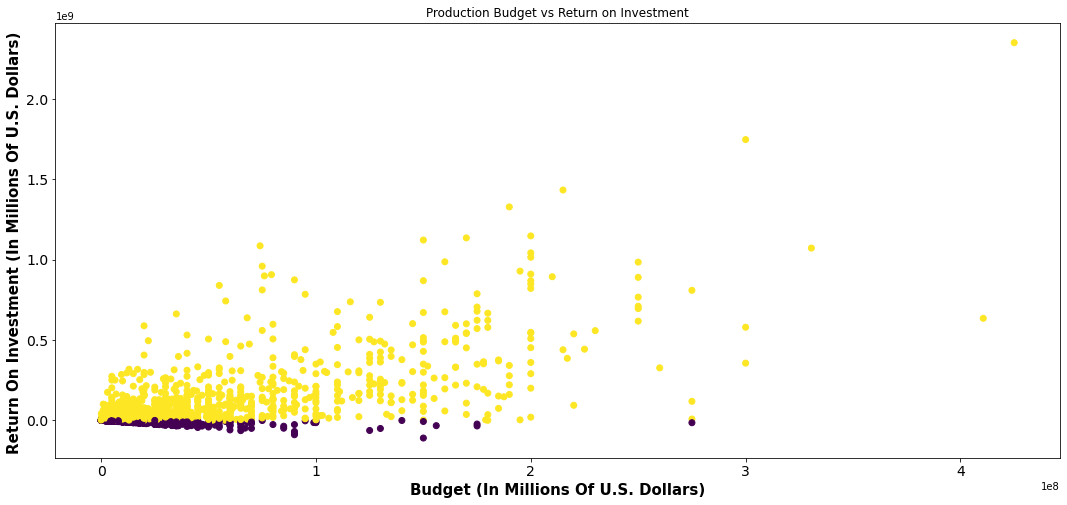

In [142]:
fig, ax = plt.subplots()
fig.set_size_inches(18,8)
x = df_budget_analysis["production_budget"]
y = df_budget_analysis["return_on_investment"]
df_budget_analysis = pd.DataFrame({'x': df_budget_analysis["production_budget"], 'y': df_budget_analysis["return_on_investment"]})
plt.xlabel('Budget (In Millions Of U.S. Dollars)', fontsize = 15 , weight ='bold')
plt.ylabel('Return On Investment (In Millions Of U.S. Dollars) ', fontsize = 15, weight ='bold')
plt.title("Production Budget vs Return on Investment")

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
ax.scatter(df_budget_analysis.x, df_budget_analysis.y, c=np.sign(df_budget_analysis.y), cmap="viridis")
plt.show()


## Results
#### The purple is movies that were a loss and yellow are movies that made a profit. There seems to be a relationship between production cost and return in investment. The movies which had a larger production cost made more money. 

## 2. Release month vs avarage revenue(worldwide_gross)

In [143]:
def group_data_by_mean(data, item_to_groupby, columns):
    grouped_data = data.groupby(item_to_groupby)[columns].mean()
    new_df = pd.DataFrame(grouped_data)
    new_df.reset_index(drop = False, inplace = True)
    
    return new_df

In [144]:
group_data_by_mean(df,'release_month','worldwide_gross')

,release_month,worldwide_gross
0,1,7.069942e+07
1,2,1.048069e+08
2,3,9.197600e+07
3,4,9.848672e+07
4,5,1.759968e+08
5,6,1.981968e+08
6,7,1.764059e+08
7,8,8.491232e+07
8,9,6.386149e+07
9,10,6.474176e+07


In [145]:
def plot_value(column):
    data = group_data_by_mean(df,'release_month', column)
    fig, axs = plt.subplots(figsize=(15, 7))
    axs.bar(data['release_month'], data[column])
    axs.set_title(f'Plot of release month against {column}', fontsize = 15)
    axs.set_xlabel('Release month', fontsize = 15)
    axs.set_ylabel(f'Mean of {column}  (Billions of Dollars)', fontsize = 15)

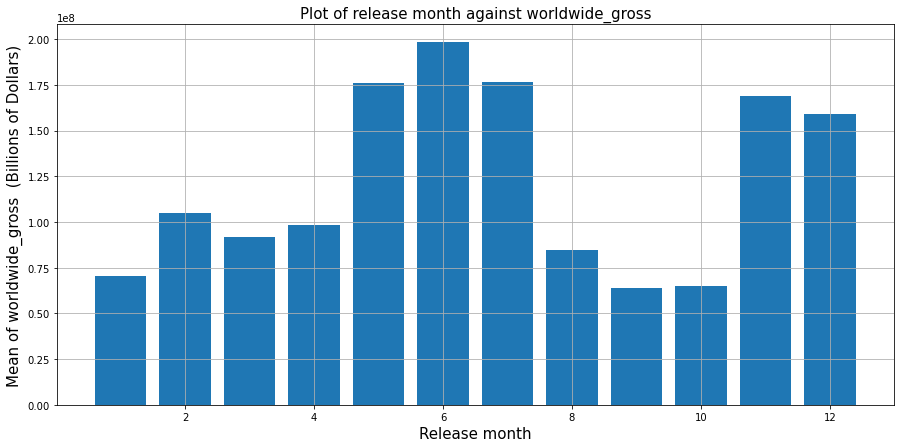

In [146]:
plot_value('worldwide_gross')
plt.grid()

# Result
#### Movies released in May,June,July gross better worldwide than movies release in August,September,October. The movies released in May, June,July made more than double the revenue of movies release in August,September, October. With movies released in June making the most revenue

# 3.Movie Genre vs Avarage Revenue(worldwide_gross)

In [147]:
genre_grouping = group_data_by_mean(df,'genres','worldwide_gross')

In [148]:
def plot_value(column):
    data = group_data_by_mean(df,'genres', column)
    fig, axs = plt.subplots(figsize=(20, 10))
    axs.bar(data['genres'], data[column])
    axs.set_title(f'Plot of genres against {column}', fontsize = 15)
    axs.set_xlabel('Genres', fontsize = 15)
    axs.set_ylabel(f'Mean of {column}  (Billions of Dollars)', fontsize = 15)
    plt.grid()

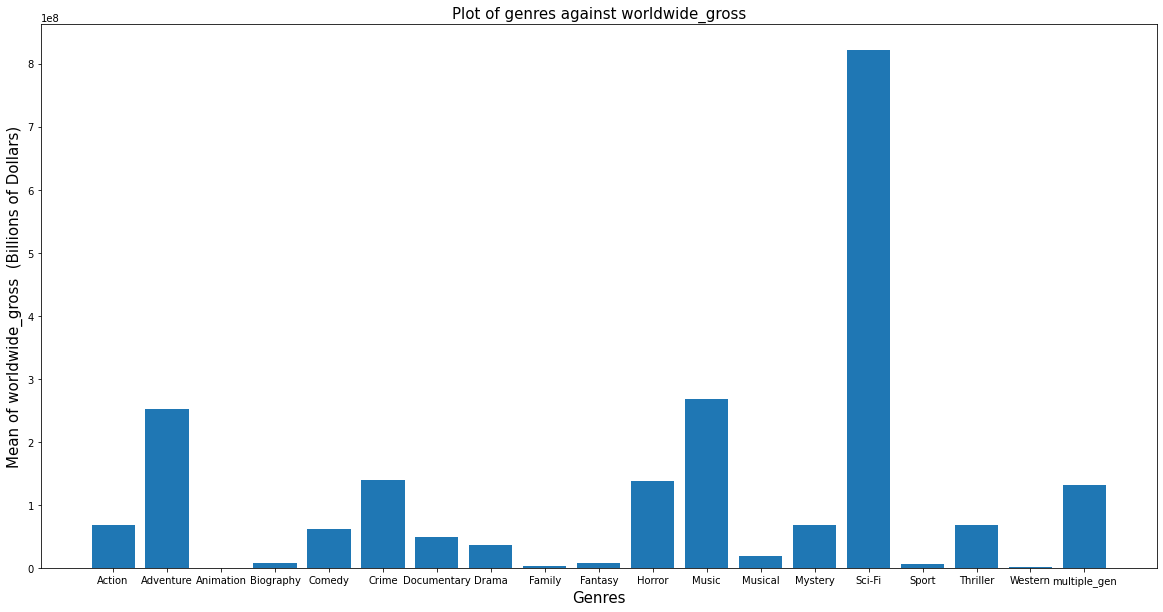

In [149]:
plot_value('worldwide_gross')
plt.grid()

# Result
Sci-Fi movies bring in the most revenue with animation bringing in the least amount of revenue. It is safer to invest in Sci-Fi movies, followed by musical movies and adventures. Animation, Western and Family brought in the least amount of revenue

# Movie language vs Avarage Revenue

In [150]:
group_data_by_mean(df,'original_language','worldwide_gross')

,original_language,worldwide_gross
0,da,2.181730e+07
1,de,1.498421e+06
2,en,1.213193e+08
3,es,1.239281e+07
4,et,1.918620e+05
5,fa,9.589780e+05
6,fr,6.790617e+07
7,gu,3.062898e+07
8,hi,5.841352e+07
9,id,1.227316e+06


In [151]:
def plot_value(column):
    data = group_data_by_mean(df,'original_language', column)
    fig, axs = plt.subplots(figsize=(20, 10))
    axs.bar(data['original_language'], data[column])
    axs.set_title(f'Plot of original language against {column}', fontsize = 15)
    axs.set_xlabel('Original Language', fontsize = 15)
    axs.set_ylabel(f'Mean of {column}  (Billions of Dollars)', fontsize = 15)

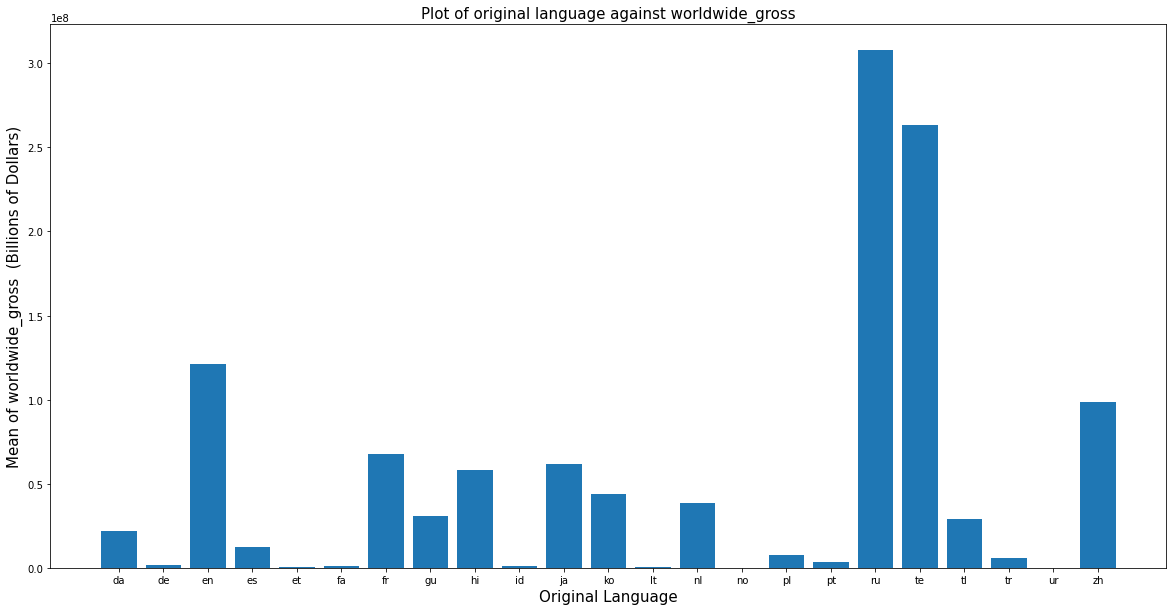

In [152]:
plot_value('worldwide_gross')

## Result
Surprisingly movies in the Russian Language made the most amount of revenue followed by those in Telugu which is a language spoken mostly by the Indian people. The movies in these languages brought in twice the revenue of those in the English language. Norwegian and Urdu(national language of Pakistan), brought in the least amount of revenue

# Coclusion
1. If the investment in production budget is higher the movie is more likely to make more money.
2. Movies released in the months of May,June,July brought in the highest amount of revenue, might be because people are out for the summer holiday
3. Sci-Fi movies are a better investment than animations or western as they make more revenue worldwide, followed by musical movies and adventures
4. Movies in the Russian and Telugu languages brought in the highest amount of revenue